### Algorithm

1. **Initialization**: Begin by initializing the cluster centers. This can be done randomly within the data range or, preferably, using some of the existing data points.
   
2. **Iterative Process**: Continue the following steps until the algorithm converges:
   - **Assignment**: Assign each data point to the nearest cluster center using the Euclidean distance as the metric.
   - **Update**: Recalculate the cluster centers by finding the mean of all data points assigned to each cluster.

### Objective Function

The objective of K-Means is to minimize the total distance between data points and their corresponding cluster centers. Given a set of data points $\{x_1, ..., x_n\}$ and a predefined number \(k\) of clusters, the clusters $\{C_1, ..., C_k\}$ are determined to minimize:

$J = \sum_{i=1}^n \sum_{j=1}^k z_{ij} \| x_i - \mu_j \|_2$

Where:
- $z_{ij} \in \{0,1\}$ indicates if data point $x_i$ belongs to cluster $C_j$.
- $\mu_j$ represents the center of cluster $C_j$.
- $\| \cdot \|_2$ is the Euclidean distance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(123)
%matplotlib inline

In [17]:
class KMeans():
    def __init__(self, k):
        self.k = k
    
    def fit(self, X):
        n_samples, _ = X.shape
        self.centers = X[np.random.choice(n_samples, self.k, replace=False)]
        self.init_centers = np.copy(self.centers)

        old = None
        epoch = 0

        while True:
            new = [self._classify(datapoint) for datapoint in X]
            if new == old:
                print("Clustering converged after {} epochs".format(epoch))
                break

            old = new
            epoch += 1

            for id in range(self.k):
                point_id = np.where(np.array(new) == id)
                datapoints = X[point_id]
                self.centers[id] = datapoints.mean(axis=0)
    
    def _classify(self, datapoint):
        dist = self._l2_dist(datapoint)
        return np.argmin(dist)
    
    def _l2_dist(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists
    
    def plots(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.')
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.init_centers[:, 0], self.init_centers[:,1], c='k')
        plt.show()

Shape of dataset: (1000, 2)


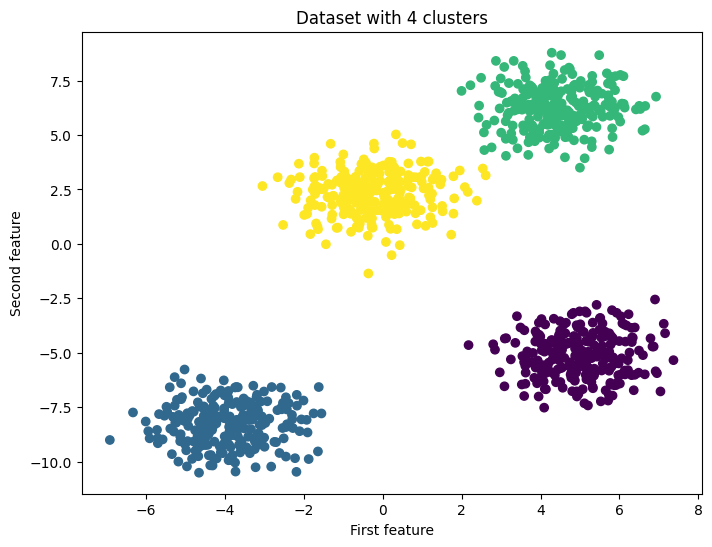

In [14]:
X, y = make_blobs(centers=4, n_samples=1000)
print(f'Shape of dataset: {X.shape}')

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [15]:
kmeans = KMeans(k=4)
kmeans.fit(X)

Clustering converged after 3 epochs


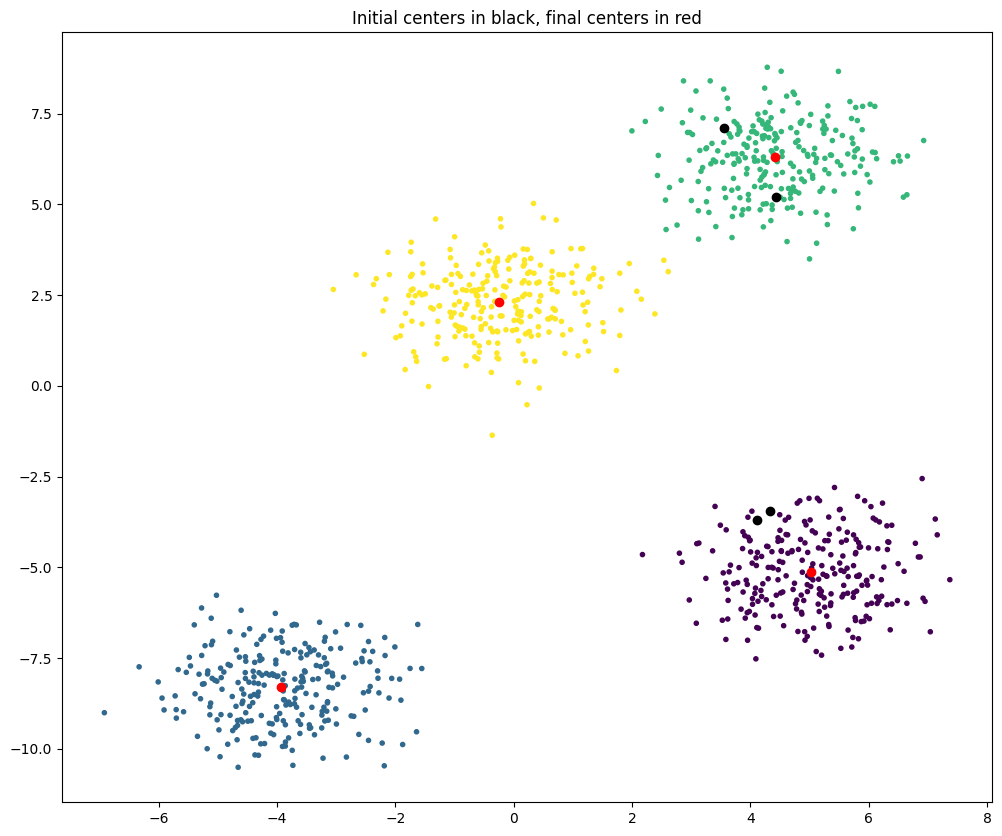

In [18]:
kmeans.plots(X)